In [17]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

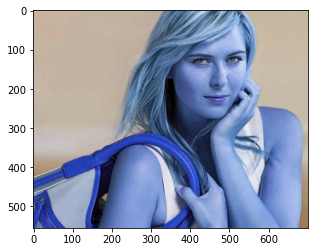

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

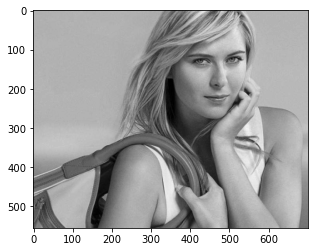

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
faceclassifier=cv2.CascadeClassifier('./celbrity face/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eyeclassifier=cv2.CascadeClassifier('./celbrity face/model/opencv/haarcascades/haarcascade_eye.xml')

In [7]:
face=faceclassifier.detectMultiScale(gray, 1.3, 5)
face

array([[352,  38, 233, 233]])

In [8]:
(x,y,w,h)=face[0]

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

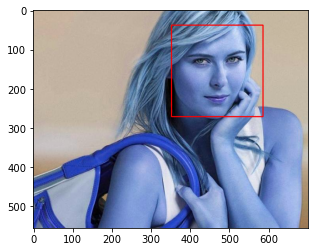

In [10]:
plt.imshow(face_img)

In [11]:
 r=face_img[y:y+h, x:x+w]

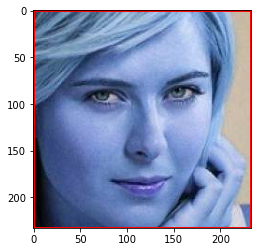

In [12]:
plt.imshow(r)

In [13]:
cv2.destroyAllWindows()


In [23]:

    
 for x,y,w,h in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_colr=face_img[y:y+h,x:x+w]
    eyes=eyeclassifier.detectMultiScale(roi_gray)
    for ex,ey,ew,eh in eyes:
        cv2.rectangle(roi_colr,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

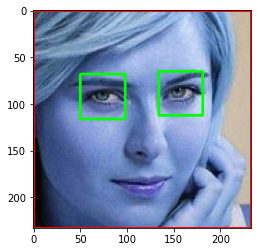

In [24]:
plt.imshow(roi_colr)

In [23]:
def classifier(imagepath):
    img=cv2.imread(imagepath)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=faceclassifier.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_colr=img[y:y+h,x:x+w]
        eyes=eyeclassifier.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_colr

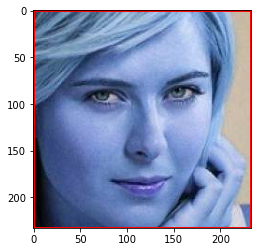

In [9]:
cropped=classifier('./test_images/sharapova1.jpg')
plt.imshow(cropped)

In [40]:
pp=cv2.imread('./test_images/sharapova1.jpg')


In [14]:
pathdata='.\\images_dataset'
pathcrop='./datasets/cropped'


In [18]:
import os
img_dirs = []
for entry in os.scandir(pathdata):
        img_dirs.append(entry.path)

In [19]:
img_dirs



['.\\images_dataset\\lionel_messi',
 '.\\images_dataset\\maria_sharapova',
 '.\\images_dataset\\roger_federer',
 '.\\images_dataset\\serena_williams',
 '.\\images_dataset\\virat_kohli']

In [20]:
import shutil
if os.path.exists(pathcrop):
    shutil.rmtree(pathcrop)
os.mkdir(pathcrop)    


In [21]:
for img_dir in img_dirs:
    celebrityname=img_dir.split('/')[-1]
    print(celebrityname)
    for entry in os.scandir(img_dir):
        print(entry.path)
        

.\images_dataset\lionel_messi
.\images_dataset\lionel_messi\02453493f852c0efe8ff951dea5845c4.jpg
.\images_dataset\lionel_messi\10_MESSI_JUGADORS-WEB.jpg
.\images_dataset\lionel_messi\1211643746.jpg.0.jpg
.\images_dataset\lionel_messi\136054219.jpg.0.jpg
.\images_dataset\lionel_messi\190703-lionel-messi.jpg
.\images_dataset\lionel_messi\20190804-The18-Image-Lionel-Messi-Speech-Camp-Nou-2019-1280x720.jpg
.\images_dataset\lionel_messi\26622.jpg
.\images_dataset\lionel_messi\27243622-0-image-m-13_1586991155251.jpg
.\images_dataset\lionel_messi\28003-1510231943.jpg
.\images_dataset\lionel_messi\28410198-8321609-image-a-96_1589497931974.jpg
.\images_dataset\lionel_messi\5bd946a6cdbadfc416e59db42422c06c.jpg
.\images_dataset\lionel_messi\5cb62e40230000c2006db3ac.jpg
.\images_dataset\lionel_messi\5de5fed30f25441e5823254c.jpg
.\images_dataset\lionel_messi\5e4bac9b3b62b77617608663.jfif
.\images_dataset\lionel_messi\636654404591000000-GTY-980548622.jpg
.\images_dataset\lionel_messi\7488bab50fd9441

.\images_dataset\serena_williams\e2e24120-0e10-4f80-8305-8a471559729d-USP_Tennis__US_Open.jfif
.\images_dataset\serena_williams\EJc7NAbXkAMVb7E.jpg
.\images_dataset\serena_williams\EPA_Britain-Tennis-Wimbledon-2019-Grand-Slam_07708067jpg-JS504550178-1.jpg
.\images_dataset\serena_williams\f_USTA1183921_20190903_USO_D9__DC27030.jpg
.\images_dataset\serena_williams\GettyImages-1146432042.jpg
.\images_dataset\serena_williams\GettyImages-2493795.jpg
.\images_dataset\serena_williams\GettyImages-546039732.jpg
.\images_dataset\serena_williams\iggy-azalea-serena-williams-that-grape-juice-2016-1191010.png
.\images_dataset\serena_williams\image.jfif
.\images_dataset\serena_williams\images (1).jfif
.\images_dataset\serena_williams\images.jfif
.\images_dataset\serena_williams\Marzorati-SerenaVenusToss.jpg
.\images_dataset\serena_williams\Marzorati-Wimbledon-Williams-Murray.jpg
.\images_dataset\serena_williams\merlin_157359645_df65b9ec-e01b-47a9-9b3a-efb7a73a7f37-superJumbo.jpg
.\images_dataset\sere

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = classifier(entry.path)
        if roi_color is not None:
            cropped_folder = pathcrop + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

.\images_dataset\lionel_messi
Generating cropped images in folder:  ./datasets/cropped.\images_dataset\lionel_messi


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [107]:
classifier('.\\images_dataset\lionel_messi\28003-1510231943.jpg')

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
cc=cv2.imread('./images_dataset/lionel_messi\136054219.jpg.0.jpg') 

NameError: name 'cv2' is not defined

In [129]:
cc.shape

(800, 1200, 3)

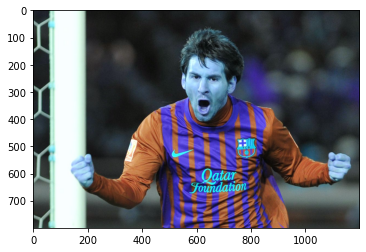

In [130]:
plt.imshow(cc)